In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pd.read_excel("precipitation.xlsx")

In [2]:
year = Data['Year'].values
month = Data['Month'].values
day = Data['Day'].values
t_min = Data['T_min'].values
t_max = Data['T_max'].values
t_mean = Data['T_mean'].values
tot_prec = Data['Total precipitation'].values
numbers = Data['No'].values

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


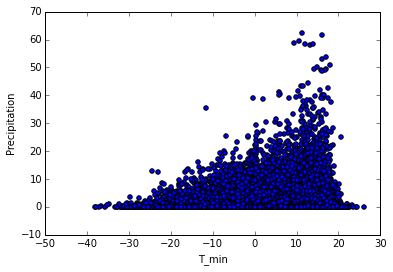

In [3]:
plt.scatter(t_min, tot_prec)
plt.xlabel('T_min')
plt.ylabel('Precipitation')

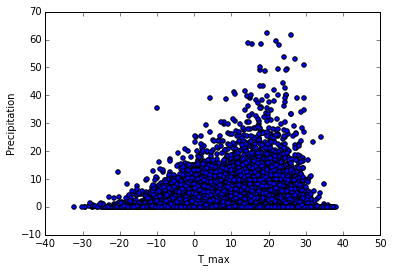

In [4]:
plt.scatter(t_max, tot_prec)
plt.xlabel('T_max')
plt.ylabel('Precipitation')

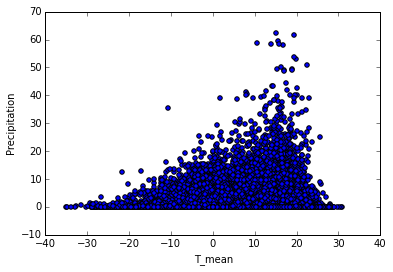

In [5]:
plt.scatter(t_mean, tot_prec)
plt.xlabel('T_mean')
plt.ylabel('Precipitation')

In [6]:
import statsmodels.api as sm
## обобщенный тест Дикки-Фуллера 
test = sm.tsa.adfuller(tot_prec)
print 'adf: ', test[0] 
print 'p-value: ', test[1]
print'Critical values: ', test[4]
if test[0]> test[4]['5%']: 
    print 'есть единичные корни, ряд не стационарен'
else:
    print 'единичных корней нет, ряд стационарен'

adf:  -24.5033912119
p-value:  0.0
Critical values:  {'5%': -2.8616565183513809, '1%': -3.4306136343287346, '10%': -2.5668320193185057}
единичных корней нет, ряд стационарен


In [11]:
##сравниваем средние
m = pd.DataFrame(tot_prec).index[len(pd.DataFrame(tot_prec).index)/2+1]
r1 = sm.stats.DescrStatsW(tot_prec[m:])
r2 = sm.stats.DescrStatsW(tot_prec[:m])
print 'p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1]

p-value:  0.015175548904


In [8]:
from scipy import stats
import statsmodels.api as sm

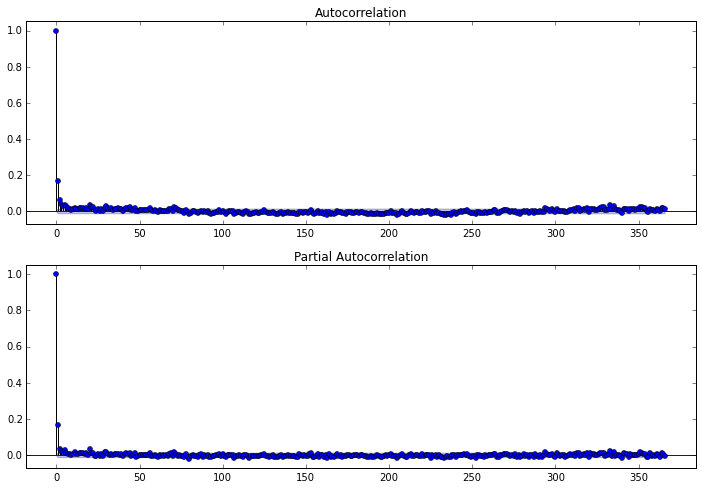

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tot_prec, lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tot_prec, lags=366, ax=ax2)

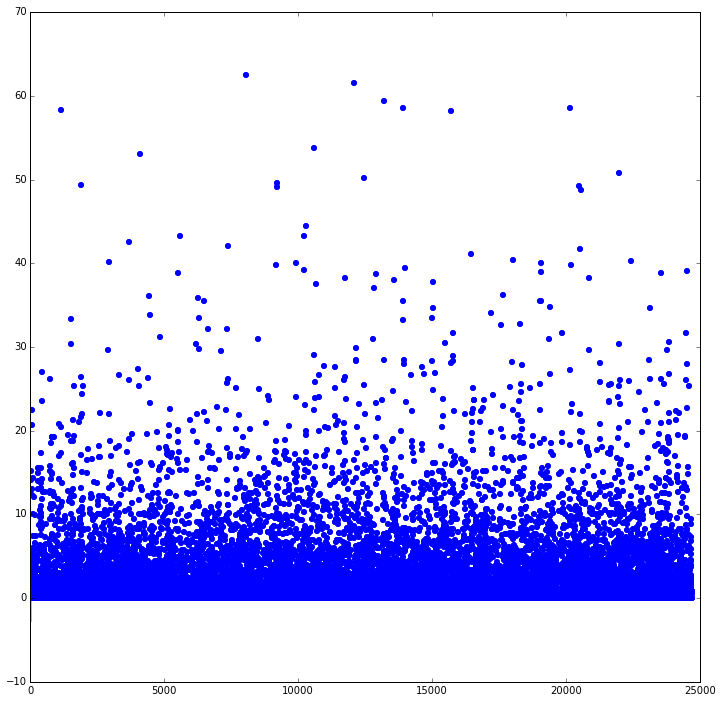

In [10]:
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
# the raw data
fig = plt.figure(figsize=(12,12))
plt.plot(numbers, tot_prec, 'o', mec='none')

#fit and overplot a 2nd order polynomial
params = np.polyfit(numbers, tot_prec, 2)
xp = np.linspace(tot_prec.min(), 2, 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k')

#overplot an error band
sig = np.std(tot_prec - np.polyval(params, tot_prec))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)

